<a href="https://colab.research.google.com/github/nomeomitido/-joaoruyfaustino--DataScience-GenAI-Submissions/blob/main/modellingproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving loan_data.csv to loan_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan_data.csv')
display(df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


In [ ]:
y=df['loan_status']
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
49995,0
49996,0
49997,0
49998,0


In [ ]:
x=df.drop('loan_status', axis=1)
x

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,4.3,39449,570,16.3,1127,7576,0,0,0,42800,21.31,0.192,1.085,0.362
49996,34,4.4,20496,672,12.6,1478,6276,1,0,0,3800,18.07,0.306,0.185,0.062
49997,41,4.8,18743,719,10.1,17,10331,0,0,0,18000,17.45,0.551,0.960,0.320
49998,38,0.4,17250,633,1.3,5,7779,0,0,1,1400,14.71,0.451,0.081,0.027


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
39087,22,2.3,17826,555,0.3,12,1204,0,1,1,1400,22.45,0.068,0.079,0.026
30893,30,1.1,21641,629,7.2,3099,7597,0,0,0,1300,14.40,0.351,0.060,0.020
45278,29,9.7,70880,577,0.6,43,4363,1,1,1,100000,15.86,0.062,1.411,0.470
16398,45,10.0,57503,590,24.6,2214,7828,0,1,0,32600,14.73,0.136,0.567,0.189
13653,32,3.4,29187,693,12.0,5864,501,0,0,0,25800,17.33,0.017,0.884,0.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,27,0.7,15000,621,8.5,151,4989,0,0,0,15400,14.19,0.333,1.027,0.342
44732,26,1.1,21006,663,5.5,535,3049,0,0,0,2100,18.93,0.145,0.100,0.033
38158,29,8.7,37851,634,9.3,4106,5411,0,1,0,42100,20.17,0.143,1.112,0.371
860,37,8.2,95603,704,10.2,3695,23903,0,1,0,70000,17.36,0.250,0.732,0.244


In [ ]:
x_test

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
33553,30,5.7,44820,679,11.0,8397,8982,0,2,0,9600,10.72,0.200,0.214,0.071
9427,27,4.3,48516,613,1.6,331,8741,0,0,0,36700,13.55,0.180,0.756,0.252
199,21,1.0,55491,590,1.5,232,22207,0,1,3,60900,21.08,0.400,1.097,0.366
12447,20,1.2,32226,598,0.5,12,4602,0,0,1,55300,16.17,0.143,1.716,0.572
39489,49,20.9,45642,725,8.9,236,7397,0,0,0,32400,9.68,0.162,0.710,0.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,18,1.0,52776,673,1.4,125,15462,0,0,0,40100,11.89,0.293,0.760,0.253
25079,45,1.5,17900,707,13.1,1081,6133,0,0,0,10000,9.06,0.343,0.559,0.186
18707,18,0.0,25453,584,1.7,93,11043,0,2,0,5000,13.85,0.434,0.196,0.065
15200,46,24.4,28592,660,4.4,366,6879,0,0,0,18000,18.35,0.241,0.630,0.210


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([ 0.45729404,  0.61677335, -0.00153158, ...,  0.6120232 ,
        0.80768413,  0.6321597 ])

In [ ]:
y_train

,loan_status
39087,0
30893,1
45278,0
16398,1
13653,1
...,...
11284,1
44732,1
38158,1
860,1


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
lr_train_mse

0.13018576811844293

In [ ]:
lr_train_r2

0.47382545925895636

In [ ]:
lr_test_mse

0.12983155134172006

In [ ]:
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)
print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)

LR MSE (Train): 0.13018576811844293
LR R2 (Train): 0.47382545925895636
LR MSE (Test): 0.12983155134172006
LR R2 (Test): 0.4756170439358839


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

In [ ]:
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.130186,0.473825,0.129832,0.475617


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forests', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forests,0.011886,0.951959,0.082346,0.667407


In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.130186,0.473825,0.129832,0.475617
0,Random forests,0.011886,0.951959,0.082346,0.667407


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.130186,0.473825,0.129832,0.475617
1,Random forests,0.011886,0.951959,0.082346,0.667407


Text(0.5, 0, 'Experimental LogS')

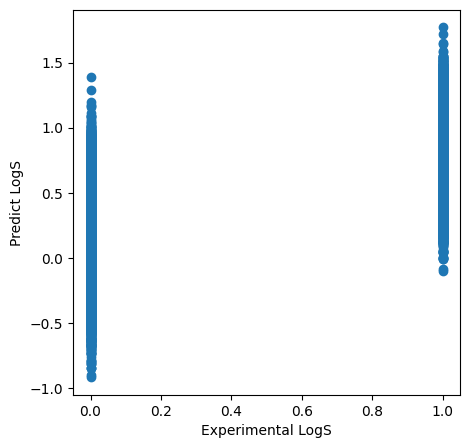

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred,)

plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')